In [1]:
import numpy as np
from tensorflow import keras

In [2]:
keras.__version__

'2.4.0'

In [3]:
keras.layers.Dense(10, activation='sigmoid')

In [4]:
keras.Model()

레이어들을 import 하는 방식
- 일일이 import

In [5]:
from tensorflow.keras.layers import Dense, Input, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

In [6]:
Dense(10, activation='relu')

In [7]:
Flatten(input_shape=[28,28])

In [8]:
X_train = np.random.randn(5500,2)
Input(shape=X_train.shape[1:])

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'input_1')>

### 주요 레이어

#### Dense
  - Fully-Connected Layer
  - 노드수(유닛수), 활성화 함수 등을 지정
  - name을 통한 레이어간 구분 가능
  - 기본적으로 (Xavier 분포 초기화)'Glorot_uniform' 가중치로 사용, zeros bias 로 초기화
  - kernel_initializer 인자를 통해 다른 가중치 초기화를 진행할 수 있음

In [9]:
dense = Dense(10, activation='relu', name='Dense Layer')
dense

In [10]:
dense2= Dense(15, activation='softmax')
dense2

### Activation
  - Dense layer 에서 미리 호라성화 함수를 지정할 수도 있지만, 때에 따라 따로 레이어를 만들 수 있다.

In [11]:
dense= Dense(10, kernel_initializer='he_normal', name='Dense Layer')
dense=Activation(dense)
dense

### Flatten
- 배치 크기를 제외하고 데이터를 1차원으로 쭉 펼치는 작업
- (128, 3, 2, 2 ) --> (128, 12)

In [12]:
Flatten(input_shape=(28,28))

### Input
- 데이터를 실질적으로 받아오는 역할
- 모델의 입력을 정의
- shape, dtype 을 포함
- 하나의 모델은 여러 개의 입력을 가질 수 있음
- summary()  메소드를 통해서는 보이지 않음

In [13]:
import tensorflow as tf

In [14]:
input_1 = Input(shape=(28,28), dtype =tf.float32)
input_2 = Input(shape=(8,), dtype=tf.int32)

In [15]:
input_1

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_2')>

In [16]:
input_2

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_3')>

### 모델 구성 방법
- Sequential()
- 서브클래싱(Subclassing)
- 함수형 API

### Sequential()
- 모델이 순차적으로 진행할 때 사용
- 간단한 방법
  - Sequential 객체 생성 후, add를 통한 방법
  - Sequential 인자에 한번에 추가
- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음

In [17]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model
# plot_model 은 시각화 유틸리티

In [18]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
# 최종결과 확인
model.add(Dense(10, activation='softmax'))

[모델 구조 확인]
- model 객체의 summary() 이용

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28, 300)           8700      
_________________________________________________________________
dense_4 (Dense)              (None, 28, 100)           30100     
_________________________________________________________________
dense_5 (Dense)              (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


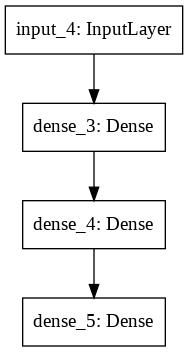

In [20]:
plot_model(model)

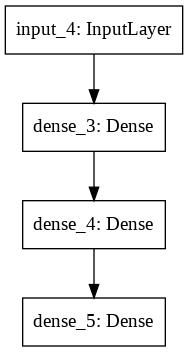

In [21]:
plot_model(model, to_file='model1.png')

In [22]:
!ls

model1.png  model.png  sample_data


In [23]:
model = Sequential([Input(shape=(28,28), name='Input'),
                    Dense(300, activation='relu', name='Dense1'),
                    Dense(100, activation='relu', name='Dense2'),
                    Dense(10, activation='softmax', name='Output')])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 28, 300)           8700      
_________________________________________________________________
Dense2 (Dense)               (None, 28, 100)           30100     
_________________________________________________________________
Output (Dense)               (None, 28, 10)            1010      
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


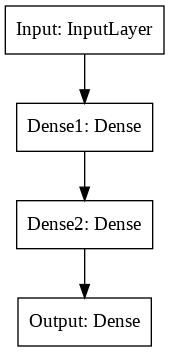

In [25]:
plot_model(model)

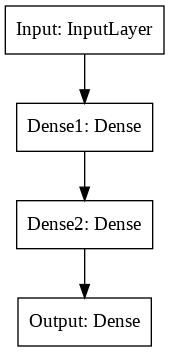

In [26]:
plot_model(model, to_file='model2.png')

In [27]:
!ls

model1.png  model2.png	model.png  sample_data


### 함수형 API
- 가장 권장되는 방법
- 모델을 복잡하고, 유연하게 구성 가능
- 다중 입출력을 다룰 수 있음

In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [29]:
inputs= Input(shape=(28,28,1))
# 앞의 inputs 를 Flatten
x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

In [30]:
model = Model(inputs=inputs, outputs=x)

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


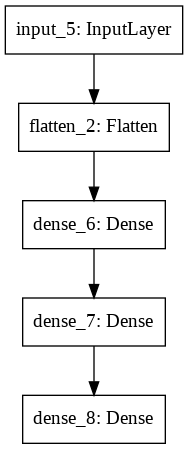

In [32]:
plot_model(model)

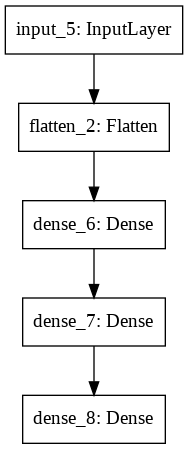

In [33]:
plot_model(model, to_file='model3.png')

## Concatenate
- 2 개 이상의 레이어를 합치기

In [34]:
from tensorflow.keras.layers import Concatenate
input_layer = Input(shape=(28,28))
hidden1 = Dense(100, activation='relu')(input_layer)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model = Model(inputs=[input_layer], outputs=[output])

In [35]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 28, 100)      2900        input_6[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 28, 30)       3030        dense_9[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 28, 58)       0           input_6[0][0]                    
                                                                 dense_10[0][0]             

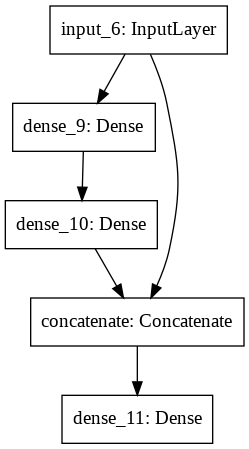

In [36]:
plot_model(model)

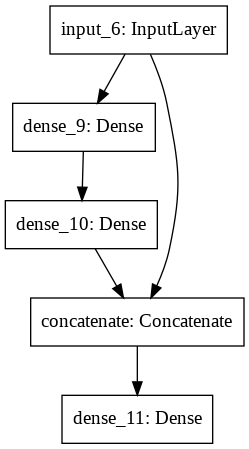

In [37]:
plot_model(model, to_file='model4.png')

## 다중입력

In [38]:
input_1 = Input(shape=(10,10), name='input_1')
input_2 = Input(shape=(10,28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1,hidden2])

output = Dense(1, activation='sigmoid', name='output')(concat)

model= Model(inputs=[input_1, input_2], outputs=output)

In [39]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 10, 10)       1010        dense_12[0][0]                   
____________________________________________________________________________________________

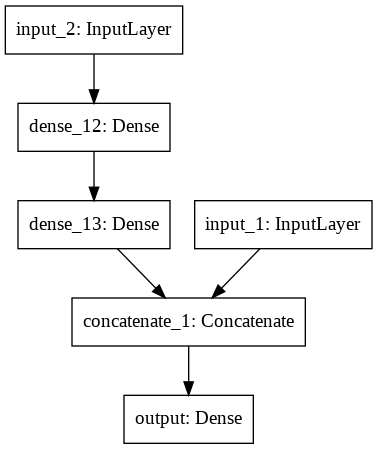

In [40]:
plot_model(model)

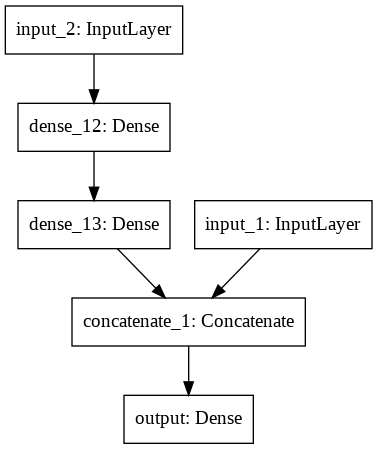

In [41]:
plot_model(model, to_file='model5.png')

## 다중출력

In [42]:
input_ = Input(shape=(10,10), name='input_')

hidden1 = Dense(100, activation='relu')(input_)
hidden2 = Dense(10, activation='relu')(hidden1)

output = Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = Dense(1, name='sub_output')(hidden2)

model= Model(inputs=[input_], outputs=[output,sub_out])

In [43]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ (InputLayer)             [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 10, 100)      1100        input_[0][0]                     
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 10, 10)       1010        dense_14[0][0]                   
__________________________________________________________________________________________________
main_output (Dense)             (None, 10, 1)        11          dense_15[0][0]                   
____________________________________________________________________________________________

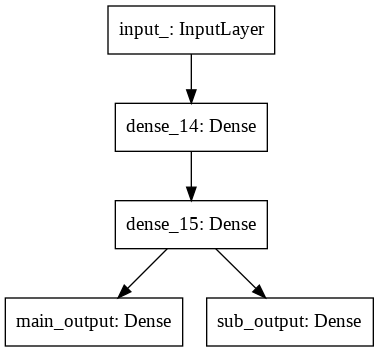

In [44]:
plot_model(model)

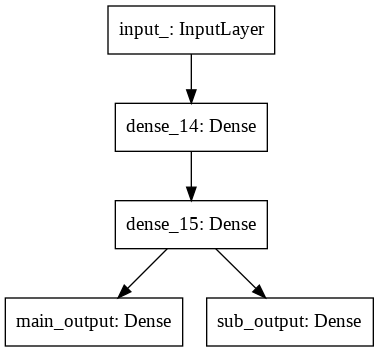

In [45]:
plot_model(model, to_file='model6.png')

## 입력, 출력 다중인 경우

In [46]:
input_1 = Input(shape=(10,10), name='input_1')
input_2 = Input(shape=(10,28), name='input_2')

hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat= Concatenate()([input_1, hidden2])

output = Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = Dense(1, name='sum_output')(hidden2)

model = Model(inputs=[input_1, input_2], outputs = [output, sub_out])

In [47]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10, 28)]     0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 10, 100)      2900        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 10, 10)]     0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 10, 10)       1010        dense_16[0][0]                   
____________________________________________________________________________________________

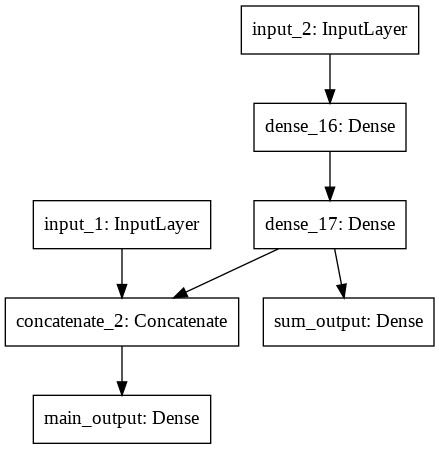

In [48]:
plot_model(model)

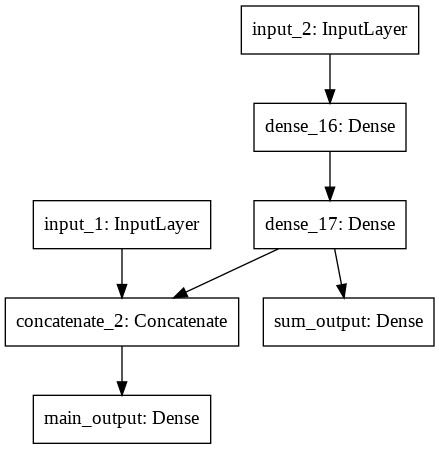

In [49]:
plot_model(model, to_file='model7.png')

## 서브클래싱(Subclassing)
- 커스터마이징에 최적화된 방법
- Model 클래스를 상속받아 Model 이 포함하는 기능을 사용할 수 있음
  - fit(), evaluate(), predict()
  - save(), load()
- 주로 call() 메소드 안에서 원하는 계산 가능
  - for, if , 저수준 연산 등
- 권장되는 방법은 아니지만, 어떤 모델의 구현 코드를 참고할 때 해석할줄 알아야 한다!

In [50]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import plot_model


In [51]:
class MyModel(Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)

    self.dense_layer1 = Dense(300, activation=activation)
    self.dense_layer2 = Dense(100, activation=activation)
    self.dense_layer3 = Dense(units, activation=activation)
    self.output_layer = Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x

## 모델 가중치 확인

In [52]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [53]:
inputs = Input(shape=(28,28,1))
x=Flatten(input_shape=(28,28,1))(inputs)
x=Dense(300, activation='relu')(x)
x=Dense(100, activation='relu')(x)
x=Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

In [54]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## 모델의 레이어들이 리스트로 표현됨

In [55]:
model.layers

In [56]:
hidden_2 = model.layers[2]
hidden_2.name

'dense_18'

In [57]:
weights, biases = hidden_2.get_weights()
weights

array([[-0.05006802,  0.02065547, -0.04808326, ...,  0.01930054,
         0.03580095, -0.02694128],
       [-0.04709356, -0.0439853 ,  0.03059104, ..., -0.03791216,
        -0.06931006, -0.0060112 ],
       [ 0.03168949,  0.04270858,  0.02742377, ..., -0.00476027,
         0.02976447,  0.06352611],
       ...,
       [ 0.05166478, -0.05225855, -0.04638218, ...,  0.03771467,
         0.00077138, -0.03039002],
       [ 0.02858542,  0.01579893, -0.022427  , ..., -0.06060627,
        -0.0687187 ,  0.0092288 ],
       [ 0.06035057, -0.01908363,  0.06751955, ..., -0.03905235,
         0.00746906, -0.0354546 ]], dtype=float32)

In [58]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [59]:
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


## 모델 컴파일(compile)
- 모델을 구성한 후 , 사용할 손실함수(loss), 옵티마이저(optimizer)를 지정

- sparse_categorical_crossentropy
  - 클래스가 배타적, 즉 MNIST 예제에서 (0,1,2, ..., 9) 와 같은 방식으로 구분되어 있을 때 사용
- categorical_cross_entropy
  - 클래스가 원 - 핫 인코딩 방식으로 되어 있을 때 사용
  - binary_crossentropy 이진 분류를 수행할 때 사용


In [61]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


## Optimizer
- keras.optimizer.SGD() 등과 같이 사용 가능
  - 보통 옵티마이저의 튜닝을 위해 따로 객체를 생성하여 컴파일

In [ ]:
optimizer= keras.optimizer.SGD(learning_rate=1e-5)
model.compile(...,
              optimizer=optimizer,
              ...))

## Metrics 
- 모니터링할 지표
- 주로 accuracy, acc 로 지정

## 컴파일 설정 예시

In [ ]:
# 평균 제곱 오차 회귀문제 
model.compile(loss = 'mse',
              optimizer = RMSprop(),
              metrics=['mae'])

# 이진 분류
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# 다항 분류
model.compile(loss='categorical_crossentropy',
              optimizer= RMSprop(),
              metrics=['accuracy'])

## 모델 훈련 , 평가 및 예측
- fit() 함수
  - train_data(학습 데이터), train_label(데이터의 정답)
  - epochs : 얼만큼 학습을 시킬 것인가
  - batch_size
  - validation_data
- evaluate() 함수 : 평가를 위해 사용되는 함수
  - 테스트 데이터
- predict() 함수 : 임의의 데이터를 인자로 넣어 예측 가능